Notebook showing usage of the data detective package.

**References**
* https://facebook.github.io/prophet/

In [52]:
import detective.core as detective
import detective.helpers as helpers
from fbprophet import Prophet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To load from a local db, we just need the path

In [2]:
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'
DB_URL = 'sqlite:////' + db_path

Alternatively, to load from a cloud database we load from a json file containing the url as the url contains our credentials and we want to lkeep these a secret. To learn how the Google CLoud SQL recorder can be setup checkout https://github.com/robmarkcole/HASS-Google-Cloud-SQL

In [3]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = helpers.load_url(filename)

## Load the db data

We use the DataParser class to load data from the database. This class performs the SQL queries and parses the returned data. The class holds the master pandas dataframe master_df.

In [4]:
%%time
parser = detective.DataParser(DB_URL)

Querying the database, this could take a while
CPU times: user 5.42 s, sys: 1.07 s, total: 6.49 s
Wall time: 36.2 s


Lets create an object holding the numerical sensor

In [5]:
sensors_num = detective.NumericalSensors(parser.master_df)

We can access the list of sensor entities using the list_sensors attribute

In [6]:
sensors_num.entities[0:10]

['sensor.bme680humidity',
 'sensor.bme680pressure',
 'sensor.next_train_in',
 'sensor.living_room_temperature',
 'sensor.darksky_sensor_temperature',
 'sensor.mean_temperature',
 'sensor.bme680temperature',
 'sensor.bedroom_temperature',
 'sensor.next_train_to_wim',
 'sensor.network_up']

Now lets look at the dataframe

In [7]:
sensors_num.data.head()

entity,sensor.bayes_probability,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.cpu_load_total,sensor.darksky_sensor_precip_probability,...,sensor.mean_temperature,sensor.memory_usage_real,sensor.network_up,sensor.next_train_in,sensor.next_train_to_wim,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.time_in_bed,sensor.volume_used_volume_1,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2018-01-23 07:16:58.762162,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,7.16,19.7,38.0
2018-01-23 07:16:58.910505,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:16:59.094701,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.256479,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.484865,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0


Lets now check for correlations in the data using the all_corrs() method

In [8]:
corrs = sensors_num.correlations()

In [9]:
corrs[(corrs['value'] > 0.5) | (corrs['value'] < -0.5)]

,value
sensor.next_train_to_wim-sensor.next_train_in,0.978054
sensor.bedroom_temperature-sensor.mean_temperature,0.857884
sensor.mean_temperature-sensor.blink_blink_camera_percy_temperature,0.833413
sensor.living_room_temperature-sensor.mean_temperature,0.792560
sensor.mean_temperature-sensor.hall_temperature,0.776353
sensor.living_room_temperature-sensor.bedroom_temperature,0.708225
sensor.bedroom_temperature-sensor.blink_blink_camera_percy_temperature,0.674816
sensor.blink_blink_camera_percy_temperature-sensor.hall_temperature,0.582241
sensor.darksky_sensor_temperature-sensor.mean_temperature,-0.501470
sensor.home_to_waterloo-sensor.robins_iphone_battery_level,-0.570025


Unsurprisingly the mean temperature is strongly correlated with all of the temperature sensors. 

Interestingly my iphone battery level is somewhat inversely correlated with the travel time from home to waterloo, which gets longer late at night when my battery level is more likely to be low. 

#### Plot sensor data
Convenience to plot a sensor data.

In [10]:
to_plot = ['sensor.living_room_temperature',
           'sensor.bedroom_temperature',
           'sensor.darksky_sensor_temperature']

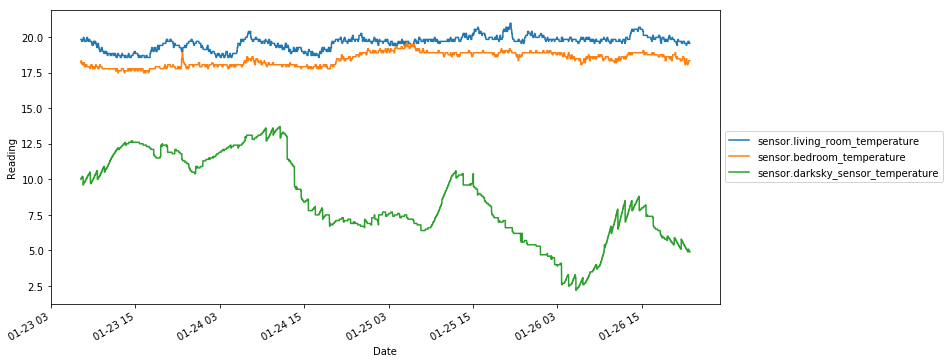

In [11]:
sensors_num.plot(to_plot)

#### Pairplot
A seaborn pair plot to show correlations.

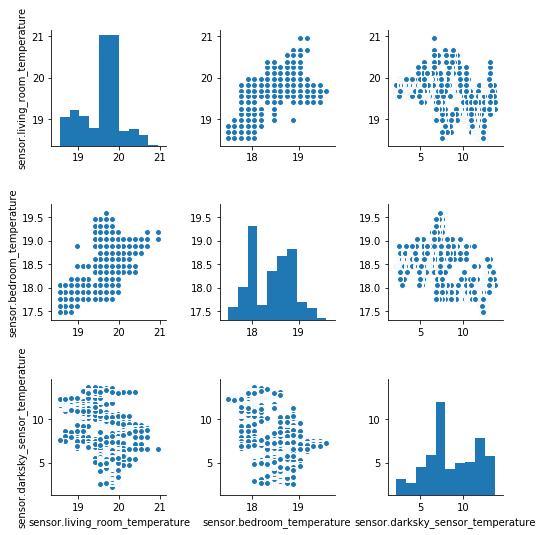

In [14]:
sns.pairplot(sensors_num.data[to_plot])

#### Prediction with prophet
Lets do some forecasting using prophet. We require a single sensor which is a pandas data series object.

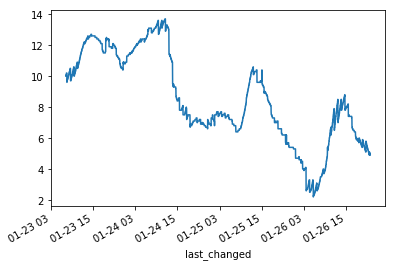

In [21]:
sensor_ds = sensors_num.data['sensor.darksky_sensor_temperature']
sensor_ds.plot()

In [22]:
sensor_ds.name

'sensor.darksky_sensor_temperature'

In [56]:
class Prediction():
    """
    Class handling predictions for a single numerical sensor.
    """
    def __init__(self, sensor_ds):
        """
        Parameters
        ----------
        sensor_ds : pandas series
            The pandas series for a single sensor.
        """
        self._sensor_ds = sensor_ds
        self._name = sensor_ds.name + "_prediction"

    def create_prophet_model(self, **kwargs):
        """
        Creates a prophet model.
        Allows adjustment via keyword arguments
        """
        model = Prophet(**kwargs)
        return model

    def prophet_model(self, periods=0, freq='S', **kwargs):
        """
        Make a propet model for the given sensor for the number of periods.

        Parameters
        ----------

        periods : int
            The default period is 0 (no forecast)

        freq : str
            Unit of time, defaults to seconds.
        """

        sensor_df = self._sensor_ds.to_frame() # Convert series to dataframe
        sensor_df.reset_index(level=0, inplace=True) # Convert index to col.
        sensor_df.columns = [['ds', 'y']] # Rename cols.
            
        # Create the model and fit on dataframe
     #   model = self.create_prophet_model(**kwargs)
     #   model.fit(sensor_df)

        # Make a future dataframe for specified number of periods
     #   future = model.make_future_dataframe(periods=periods, freq=freq)
      #  future = model.predict(future)

        # Return the model and future dataframe for plotting
     #   return model, future
        return sensor_df
            
    @property
    def name(self):
        """Return the prediction name."""
        return self._name

In [57]:
pred1 = Prediction(sensor_ds)

In [61]:
model = pred1.create_prophet_model()

In [58]:
%%time
model, future = pred1.prophet_model(periods=60, freq='H')

CPU times: user 6.24 ms, sys: 15.2 ms, total: 21.5 ms
Wall time: 38.8 ms


In [59]:
sensor_df = pred1.prophet_model(periods=60, freq='H')

In [74]:
sensor_df = sensor_df.drop_duplicates(inplace=True)

In [70]:
sensor_df[0:20]

,ds,y
0,2018-01-23 07:16:58.762162,10.0
1,2018-01-23 07:16:58.910505,10.0
2,2018-01-23 07:16:59.094701,10.0
3,2018-01-23 07:17:04.256479,10.0
4,2018-01-23 07:17:04.484865,10.0
5,2018-01-23 07:17:04.488326,10.0
6,2018-01-23 07:17:20.533774,10.0
7,2018-01-23 07:17:20.536640,10.0
8,2018-01-23 07:17:20.539698,10.0
9,2018-01-23 07:17:20.542156,10.0


In [68]:
m = Prophet()
m.fit(sensor_df);

AttributeError: 'tuple' object has no attribute 'lower'

In [62]:
model.fit(sensor_df)

AttributeError: 'tuple' object has no attribute 'lower'

In [60]:
sensor_df.head()

,ds,y
0,2018-01-23 07:16:58.762162,10.0
1,2018-01-23 07:16:58.910505,10.0
2,2018-01-23 07:16:59.094701,10.0
3,2018-01-23 07:17:04.256479,10.0
4,2018-01-23 07:17:04.484865,10.0


In [16]:
model.plot(future)
plt.show()

NameError: name 'model' is not defined

In [ ]:
model.plot_components(future)
plt.show()

Clearly the daily trend is for the warmest temperatures at early afternoon